In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [131]:
import yfinance as yf

msft = yf.Ticker("MSFT")

In [132]:
msft.history(period='2y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-07,106.53,109.26,106.50,108.99,37901700,0.0,0
2018-11-08,108.83,109.23,107.97,108.78,25644100,0.0,0
2018-11-09,107.91,108.49,105.87,106.66,32039200,0.0,0
2018-11-12,106.51,107.04,103.28,104.03,33621800,0.0,0
2018-11-13,104.69,105.85,103.81,104.10,35374600,0.0,0
...,...,...,...,...,...,...,...
2020-11-02,204.29,205.28,200.12,202.33,30842200,0.0,0
2020-11-03,203.89,208.12,203.12,206.43,27512000,0.0,0
2020-11-04,214.02,218.32,212.42,216.39,42311800,0.0,0


In [133]:
df = msft.history(period='2y')['Open'].values
df = df.reshape(-1,1)

In [134]:
df.shape

(504, 1)

In [135]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(403, 1)
(151, 1)


In [136]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.13567486],
       [0.15875564],
       [0.14952333],
       [0.13547416],
       [0.11721024],
       [0.12714501],
       [0.09663823]])

In [137]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.66713497],
       [0.75965881],
       [0.72052183],
       [0.72744606],
       [0.70737582],
       [0.75373808],
       [0.775715  ]])

In [138]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [139]:
a = create_my_dataset(dataset_train)
print(a[0].size)
print(a[1].size)

17650
353


In [140]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.13567486, 0.15875564, 0.14952333, 0.13547416, 0.11721024,
        0.12714501, 0.09663823, 0.11721024, 0.12885098, 0.065429  ,
        0.08299047, 0.06904165, 0.09473156, 0.10928249, 0.12513798,
        0.14902158, 0.15273457, 0.17521325, 0.16487707, 0.10486703,
        0.12995484, 0.09483191, 0.14390366, 0.15454089, 0.14169594,
        0.12865028, 0.10075263, 0.08449574, 0.08349222, 0.07767185,
        0.06372303, 0.02498746, 0.        , 0.04084295, 0.06823884,
        0.06041144, 0.04335173, 0.04867035, 0.04495735, 0.06382338,
        0.0775715 , 0.0855996 , 0.07927747, 0.07897642, 0.06633216,
        0.07235324, 0.09934772, 0.09673859, 0.12092323, 0.11389865]])

In [141]:
y_train[:1]

array([0.10777722])

In [142]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.66713497, 0.75965881, 0.72052183, 0.72744606, 0.70737582,
        0.75373808, 0.775715  , 0.80672353, 0.85860512, 0.82990467,
        0.79869543, 0.77762168, 0.80481686, 0.78434521, 0.82950326,
        0.81956849, 0.7958856 , 0.86362268, 0.82167587, 0.80863021,
        0.8697441 , 0.88439538, 0.90526844, 0.91329654, 0.89503261,
        0.93146011, 0.88901154, 0.83903663, 0.85418966, 0.92102358,
        0.91379829, 0.91670848, 0.9226292 , 0.90055193, 0.93206222,
        0.87064727, 0.87596588, 0.89593578, 0.8940291 , 0.91118916,
        0.91680883, 0.91169092, 0.89483191, 0.92804817, 0.94872052,
        0.98003011, 1.        , 0.97410938, 0.9144004 , 0.99759157]])

In [143]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)


(353, 50, 1)
(101, 50, 1)


In [144]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [145]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 50, 96)            37632     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 96)                74112     
_________________________________________________________________
dropout_18 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [146]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [147]:
if(not os.path.exists('stock_prediction_EPBS_20_64.h5')):
    model.fit(x_train, y_train, epochs=20, batch_size=64)
    model.save('stock_prediction_EPBS_20_64.h5')

Epoch 1/20
353/353 [==============================] - 11s 31ms/step - loss: 0.1317
Epoch 2/20
353/353 [==============================] - 4s 10ms/step - loss: 0.0326
Epoch 3/20
353/353 [==============================] - 3s 10ms/step - loss: 0.0170
Epoch 4/20
353/353 [==============================] - 4s 12ms/step - loss: 0.0141
Epoch 5/20
353/353 [==============================] - 4s 12ms/step - loss: 0.0124
Epoch 6/20
353/353 [==============================] - 4s 12ms/step - loss: 0.0095
Epoch 7/20
353/353 [==============================] - 5s 13ms/step - loss: 0.0071
Epoch 8/20
353/353 [==============================] - 4s 12ms/step - loss: 0.0074
Epoch 9/20
353/353 [==============================] - 5s 13ms/step - loss: 0.0072
Epoch 10/20
353/353 [==============================] - 4s 11ms/step - loss: 0.0059
Epoch 11/20
353/353 [==============================] - 4s 11ms/step - loss: 0.0072
Epoch 12/20
353/353 [==============================] - 4s 11ms/step - loss: 0.0076
Epoch 13/20


In [148]:
train_acc = model.evaluate(x_train, y_train, verbose = 0)
print(f'Train: {train_acc} ')

Train: 0.003751866409961377 


range(403, 504)


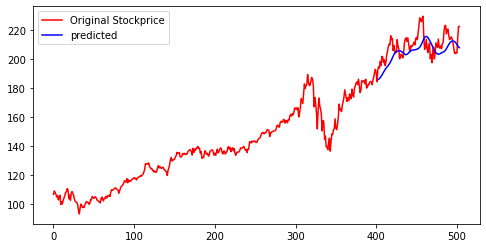

In [149]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='Original Stockprice')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color='blue',label='predicted')
plt.legend()
plt.savefig('full_image_EPBS_20_64.png')
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

In [150]:
msft.history('1mo')['Open'].values.reshape(-1,1)

array([[207.06],
       [210.51],
       [211.23],
       [218.79],
       [222.72],
       [223.  ],
       [217.1 ],
       [220.15],
       [220.42],
       [215.8 ],
       [213.12],
       [213.93],
       [215.03],
       [213.85],
       [211.59],
       [207.67],
       [204.07],
       [203.5 ],
       [204.29],
       [203.89],
       [214.02],
       [222.04],
       [222.26]])

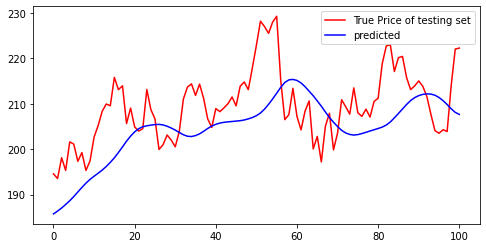

In [151]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Price of testing set')
plt.plot(predictions,color='blue',label='predicted')
plt.legend()
plt.savefig('predict_image_EPBS_20_64.png')